Identificación de hongos venenosos
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/machine-learning/blob/master/01-archivos-y-directorios.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/machine-learning/blob/master/01-archivos-y-directorios.ipynb) para ver la última versión online en `nbviewer`. 

---
[Licencia](https://github.com/jdvelasq/machine-learning/blob/master/LICENCIA.txt)  
[Readme](https://github.com/jdvelasq/machine-learning/blob/master/readme.md)

# Definición del problema real

A partir de las características físicas de un hongo desconocido se desea determinar si este es definitivamente comestible, definitivamente venenoso o de comestibilidad desconocida y no recomendada.

# Definición del problema en términos de los datos

Se tiene una muestra de 8124 muestras de hongos provenientes de 23 especies de la familia Agaricus y Lepiota. Por el tipo de problema en cuestión, los hongos de comestibilidad desconocida fueron asignados a la clase de hongos definitivamente venenosos. 

La información contenida en la muestra es la siguiente:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Fuente de los datos: https://archive.ics.uci.edu/ml/datasets/mushroom

# Exploración

In [2]:
# carga de los datos
mushrooms <- read.csv("data/mushrooms.csv", stringsAsFactors = TRUE)
str(mushrooms)

'data.frame':	8124 obs. of  23 variables:
 $ type                    : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap_shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap_surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap_color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill_attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill_spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill_size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill_color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk_shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk_r

In [4]:
# esta variable contiene un único valor y se elimina
mushrooms$veil_type <- NULL

In [5]:
# cantidad de casos para cada diagnóstico (e-edible, p-poisonous)
table(mushrooms$type)


   e    p 
4208 3916 

# Metodología OneR

La metodología OneR se basa en la partición del espacio de entrada usando una y sólo una de las variables (atributos) del problema. 

(las variables o características medibles) en regiones buscando separar en cada región un grupo de elementos que pertenecen a una clase particular. En la siguiente figura se tienen dos clases separables en un espacio de dos dimensiones ($x_1$ y $x_2$); haciendo la analogía con el problema real, los 1 podrían representar los créditos pagados (Clase 1) y los 2 los créditos morosos (Clase 2); y $x_1$ y $x_2$, dos variables de la tabla. En general, en un árbol de decisión se busca encontrar fronteras lineales paralelas a los ejes que permitan clasificar correctamente los datos. Para este ejemplo (figura izquierda), se podría decir que: 

$$\text{if } x_1~>~3 \Longrightarrow C=2 \text{  else  } C=1$$

Pero igualmente, es posible decir que (figura derecha):

$$\text{if } x_2~>~4 \Longrightarrow C=2 \text{  else  } C=1$$

El método k-NN asígna una clase (de las $P$ posibles) al nuevo ejemplo en dos pasos. En el primer paso, determina los $k$ ejemplos más cercanos (distancia) al nuevo ejemplo; en el segundo paso, asigna la clase al nuevo punto por mayoría; es decir, asigna la clase con mayor frecuencia entre los $k$ vecinos más cercnos. Por ejemplo, si se consideran 7 vecinos, de los cuales 5 son "benignos" (y 2 "malignos") entonces el nuevo punto es clasificado como "benigno".

La distancia entre dos puntos $p$ y $q$ es:

$$dist(p, q) = \sqrt{\sum_{i=1}^N (p_i - q_i)^2}$$


**Ejercicio.** ¿Cómo se implementa computacionalmente este algoritmo?

Ya que la escala de las variables numéricas afecta la medición, se pueden realizar dos transformaciones:

**Normalización min-max**.

$$z_j = \frac{x - \text{min}(x_j)}{\text{max}(x_j) - \text{min}(x_j)}$$ 

**Estandarización z.**

$$z_j = \frac{x - \text{mean}(x_j)}{\text{std}(x_j) }$$ 



Para variables nominales que representan $S$ categorías se crean $S-1$ variables: la primera variable vale 1 si la variable nominal toma el valor de la primera categoría; la segunda variable vale 2 si la variable nominal toma el valor de la segunda categoría, y así sucesivamente. ¿Por qué se requieren $S-1$ variables para $S$ categorías de la variable nominal?.  

# Preparación de los datos

# Entrenamiento del modelo

In [13]:
# carga la librería
# install.packages("OneR")
library(OneR)
mushroom_1R <- OneR(type ~ ., data = mushrooms, verbose = TRUE)
mushroom_1R


    Attribute                Accuracy
1 * odor                     98.52%  
2   spore_print_color        86.8%   
3   gill_color               80.5%   
4   ring_type                77.55%  
5   stalk_surface_above_ring 77.45%  
6   stalk_surface_below_ring 76.61%  
7   gill_size                75.63%  
8   bruises                  74.4%   
9   population               72.18%  
10  stalk_color_above_ring   71.64%  
11  stalk_color_below_ring   71.44%  
12  habitat                  69.03%  
13  stalk_root               64.6%   
14  gill_spacing             61.6%   
15  cap_color                59.53%  
16  cap_surface              58.05%  
17  cap_shape                56.43%  
18  stalk_shape              55.29%  
19  ring_number              53.82%  
20  veil_color               51.9%   
21  gill_attachment          51.8%   
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'




Call:
OneR.formula(formula = type ~ ., data = mushrooms, verbose = TRUE)

Rules:
If odor = a then type = e
If odor = c then type = p
If odor = f then type = p
If odor = l then type = e
If odor = m then type = p
If odor = n then type = e
If odor = p then type = p
If odor = s then type = p
If odor = y then type = p

Accuracy:
8004 of 8124 instances classified correctly (98.52%)


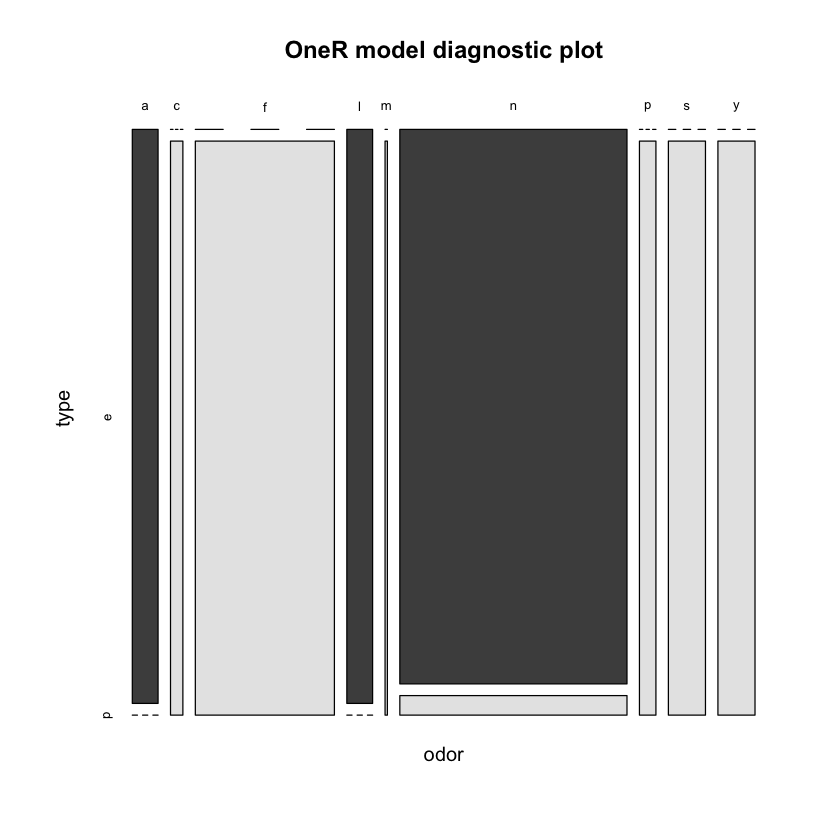

In [14]:
plot(mushroom_1R)

# Evaluación del modelo

In [11]:
summary(mushroom_1R)


Call:
OneR.formula(formula = type ~ ., data = mushrooms)

Rules:
If odor = a then type = e
If odor = c then type = p
If odor = f then type = p
If odor = l then type = e
If odor = m then type = p
If odor = n then type = e
If odor = p then type = p
If odor = s then type = p
If odor = y then type = p

Accuracy:
8004 of 8124 instances classified correctly (98.52%)

Contingency table:
     odor
type      a     c      f     l    m      n     p     s     y  Sum
  e   * 400     0      0 * 400    0 * 3408     0     0     0 4208
  p       0 * 192 * 2160     0 * 36    120 * 256 * 576 * 576 3916
  Sum   400   192   2160   400   36   3528   256   576   576 8124
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 7659.7, df = 8, p-value < 2.2e-16

